In [0]:
!unzip Data-Images.zip

# Imports

In [0]:
import requests
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import cv2

import json

# Load the `.json` file containing the download paths of the images

In [0]:
# read the data
data = pd.read_json('Indian_Number_plates.json',lines=True)
pd.set_option('display.max_colwidth', -1)
# delete the extras column
del data['extras']
# check the data dataframe
data.head()

,annotation,content
0,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg
1,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg
2,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg
3,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg
4,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg


In [0]:
# Extract the points of the bounding boxes because thats what we want
data['points'] = data.apply(lambda row: row['annotation'][0]['points'], axis=1)

data['height'] = data.apply(lambda row: row['annotation'][0]['imageHeight'], axis=1)
data['width'] = data.apply(lambda row: row['annotation'][0]['imageWidth'], axis=1)
# And drop the rest of the annotation info
del data['annotation']

data.head()

,content,points,height,width
0,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,"[{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}]",466,806
1,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,"[{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}]",449,494
2,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,"[{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}]",314,500
3,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,"[{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}]",469,500
4,http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,"[{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}]",563,1001


In [0]:
Images = []
Plates = []
Points = []

def downloadTraining(df):

    for index, row in df.iterrows():

        # Get the image from the URL
        resp = urllib.request.urlopen(row[0])
        im = np.array(Image.open(resp))  # This is a numpy 3D array 
        
        # We append the image to the training input array
        Images.append(im)

        # Points of rectangle
        x_point_top = row[1][0]['x']*im.shape[1]
        y_point_top = row[1][0]['y']*im.shape[0]
        x_point_bot = row[1][1]['x']*im.shape[1]
        y_point_bot = row[1][1]['y']*im.shape[0]
        Points.append([int(x_point_top), int(y_point_top),int(x_point_bot), int(y_point_bot)])
        
        # Cut the plate from the image and use it as output
        carImage = Image.fromarray(im)
        plateImage = carImage.crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
        Plates.append(np.array(plateImage))
downloadTraining(data)

In [0]:
len(Points)

237

# To check the x_min,y_min,x_max,y_max

In [0]:
# This gives the format of the annotations
Points[:10]

[[581, 273, 700, 320],
 [79, 381, 288, 449],
 [41, 219, 115, 259],
 [217, 312, 359, 359],
 [208, 219, 865, 553],
 [105, 279, 260, 335],
 [226, 240, 443, 314],
 [266, 247, 396, 320],
 [644, 507, 892, 578],
 [674, 364, 957, 572]]

# Dataframe construction

In [0]:
main_df = pd.DataFrame([row for row in Points], columns=['xmin', 'ymin', 'xmax', 'ymax'])
main_df.head()

,xmin,ymin,xmax,ymax
0,581,273,700,320
1,79,381,288,449
2,41,219,115,259
3,217,312,359,359
4,208,219,865,553


# The great (not really) filename generation hack

In [0]:
images_path = 'Data-Images/Cars/'
give_me_236 = [images_path + str(i) + '.jpg' for i in list(range(0, 237))]
give_me_236[:10]


['Data-Images/Cars/0.jpg',
 'Data-Images/Cars/1.jpg',
 'Data-Images/Cars/2.jpg',
 'Data-Images/Cars/3.jpg',
 'Data-Images/Cars/4.jpg',
 'Data-Images/Cars/5.jpg',
 'Data-Images/Cars/6.jpg',
 'Data-Images/Cars/7.jpg',
 'Data-Images/Cars/8.jpg',
 'Data-Images/Cars/9.jpg']

In [0]:
main_df['filename'] = give_me_236
main_df.head(10)

,xmin,ymin,xmax,ymax,filename
0,581,273,700,320,Data-Images/Cars/0.jpg
1,79,381,288,449,Data-Images/Cars/1.jpg
2,41,219,115,259,Data-Images/Cars/2.jpg
3,217,312,359,359,Data-Images/Cars/3.jpg
4,208,219,865,553,Data-Images/Cars/4.jpg
5,105,279,260,335,Data-Images/Cars/5.jpg
6,226,240,443,314,Data-Images/Cars/6.jpg
7,266,247,396,320,Data-Images/Cars/7.jpg
8,644,507,892,578,Data-Images/Cars/8.jpg
9,674,364,957,572,Data-Images/Cars/9.jpg


In [0]:
main_df['width'] = main_df['xmax'] - main_df['xmin']
main_df['height'] = main_df['ymax'] - main_df['ymin']

main_df.head()

,xmin,ymin,xmax,ymax,filename,width,height
0,581,273,700,320,Data-Images/Cars/0.jpg,119,47
1,79,381,288,449,Data-Images/Cars/1.jpg,209,68
2,41,219,115,259,Data-Images/Cars/2.jpg,74,40
3,217,312,359,359,Data-Images/Cars/3.jpg,142,47
4,208,219,865,553,Data-Images/Cars/4.jpg,657,334


In [0]:
modified_df = pd.DataFrame()
modified_df['filename'] = main_df['filename']
modified_df['width'] = main_df['width']
modified_df['height'] = main_df['height']
modified_df['class'] = 'license_plate'
modified_df['xmin'] = main_df['xmin']
modified_df['ymin'] = main_df['ymin']
modified_df['xmax'] = main_df['xmax']
modified_df['ymax'] = main_df['ymax']

modified_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Data-Images/Cars/0.jpg,119,47,license_plate,581,273,700,320
1,Data-Images/Cars/1.jpg,209,68,license_plate,79,381,288,449
2,Data-Images/Cars/2.jpg,74,40,license_plate,41,219,115,259
3,Data-Images/Cars/3.jpg,142,47,license_plate,217,312,359,359
4,Data-Images/Cars/4.jpg,657,334,license_plate,208,219,865,553


Booh yeah! We have the data in the right format (for TensorFlow Object Detection API). 

# Splits

In [0]:
# 95% for train
train_labels = modified_df.sample(frac=0.95)
modified_df.drop(train_labels.index, axis=0, inplace=True)

# 5% for test
test_labels = modified_df

In [0]:
train_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
105,Data-Images/Cars/105.jpg,684,293,license_plate,12,106,696,399
38,Data-Images/Cars/38.jpg,118,39,license_plate,794,485,912,524
136,Data-Images/Cars/136.jpg,173,74,license_plate,155,200,328,274
127,Data-Images/Cars/127.jpg,416,154,license_plate,191,54,607,208
21,Data-Images/Cars/21.jpg,238,63,license_plate,272,2,510,65


In [0]:
test_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
5,Data-Images/Cars/5.jpg,155,56,license_plate,105,279,260,335
23,Data-Images/Cars/23.jpg,283,73,license_plate,288,423,571,496
30,Data-Images/Cars/30.jpg,1158,509,license_plate,284,176,1442,685
53,Data-Images/Cars/53.jpg,147,39,license_plate,208,155,355,194
59,Data-Images/Cars/59.jpg,210,89,license_plate,147,234,357,323


In [0]:
train_labels.shape

(225, 8)

In [0]:
test_labels.shape

(12, 8)

# Manual inspection of the bounding boxes

In [0]:
image_1 = cv2.imread('Data-Images/Cars/136.jpg')
image_1 = cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)

In [0]:
# 155	200	328	274
cv2.rectangle(image_1, (155, 200), (328, 274), (255,0,0), 2)
cv2.imwrite('rectangle.png', image_1)

True

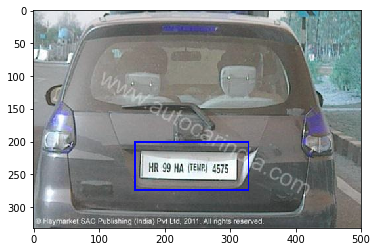

In [0]:
image = plt.imread('rectangle.png')
plt.imshow(image)
plt.show()

# Serialize the dataframes

In [0]:
train_labels.to_csv('train_labels.csv', index=False)
test_labels.to_csv('test_labels.csv', index=False)